<font size='4'><b>Problem statement:</b> Implement Multidimensional scaling (MDS) by using
    <br>1. Correlation-based distance
    <br>2. Euclidean Distance

<br/><br/>

In [15]:
# Import libraries.
import wget
import pandas as pd
import numpy as np


import sklearn
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn import preprocessing

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

In [17]:
file_name  = "Mining.csv"
zenodo_url = "https://zenodo.org/record/4159205/files/"

In [18]:
# Downloading the file Mining.csv from Zenodo.
wget.download(zenodo_url + file_name, "./Assets/" + file_name)

'./Assets/Mining.csv'

In [20]:
# Loading the downloaded file into dataframe.
df = pd.read_csv("./Assets/Mining.csv")

In [21]:
# A bird's eye view on the dataframe.
df.head(3)

,Ticker,Share Price,Earnings,Earnings/Share,Cashflow,Market Cap,Gold Production,AISC,Cash Cost,Reserve,Grade,Revenue,Shares Out
0,ACA,2.65,257.0,-1.73,-172.2,1086.5,768,875,587,7.45,3.83,751.0,410.0
1,AGI,6.51,186.0,0.09,37.1,2545.4,429,933,770,9.90,1.51,542.8,391.0
2,BTG,3.10,242.0,0.06,-163.0,3069.0,630,860,542,6.51,1.70,739.0,990.0


#### Since data are well-groomed we can directly jump into processing.

In [22]:
# Droping company names.
companies = df['Ticker'].tolist()
print('Companies:', ', '.join(companies))
df.drop(columns=['Ticker'], inplace=True)

variables = df.columns.tolist()
print('Variables:', ', '.join(variables))

Companies: ACA, AGI, BTG, CG, DGC, EGO, IAG, KL, LMC, NGD, OGC, PVG, SMF, SSRM
Variables: Share Price, Earnings, Earnings/Share, Cashflow, Market Cap, Gold Production, AISC, Cash Cost, Reserve, Grade, Revenue, Shares Out


In [23]:
# Rescaling by range
std_scaler = preprocessing.StandardScaler()
df = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns, index=df.index)
df.describe()

,Share Price,Earnings,Earnings/Share,Cashflow,Market Cap,Gold Production,AISC,Cash Cost,Reserve,Grade,Revenue,Shares Out
count,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01,1.400000e+01
mean,-1.110223e-16,-4.361590e-17,-6.344132e-17,3.172066e-17,1.665335e-16,1.110223e-16,4.123686e-16,-2.299748e-16,-9.516197e-17,-2.379049e-17,-2.379049e-17,1.586033e-17
std,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00,1.037749e+00
min,-1.009446e+00,-1.598064e+00,-2.792009e+00,-1.832745e+00,-1.452078e+00,-1.495376e+00,-2.107288e+00,-1.931421e+00,-1.307064e+00,-6.443458e-01,-1.468668e+00,-1.107969e+00
25%,-8.567089e-01,-8.432789e-01,-1.837604e-02,-5.016548e-01,-9.277150e-01,-7.663687e-01,-4.245065e-01,-7.015139e-01,-8.733296e-01,-5.221540e-01,-6.988126e-01,-8.012198e-01
50%,-1.973636e-01,-3.696456e-02,8.613768e-02,-1.204217e-01,-1.019532e-01,5.635293e-02,2.034582e-01,1.491265e-01,-2.569191e-01,-4.640239e-01,1.474196e-01,-2.758836e-01
75%,5.304932e-01,4.035232e-01,5.122320e-01,9.394123e-01,7.323159e-01,5.815871e-01,6.980317e-01,7.108020e-01,1.027676e+00,-4.465679e-02,4.487884e-01,3.556644e-01
max,2.253968e+00,1.779563e+00,1.147354e+00,1.422328e+00,1.716225e+00,1.717052e+00,1.561996e+00,1.593951e+00,1.545422e+00,2.867186e+00,1.985203e+00,2.722264e+00


### 1. Correlation-based distance

In [24]:
# Calculating correlation.
corr = df.corr()

In [27]:
# Calculating correlation-based distance.
corr_dis = 1 - corr

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
mds_trans = model.fit_transform(corr_dis)

x = mds_trans[:,0]
y = mds_trans[:,1]
z = mds_trans[:,2]

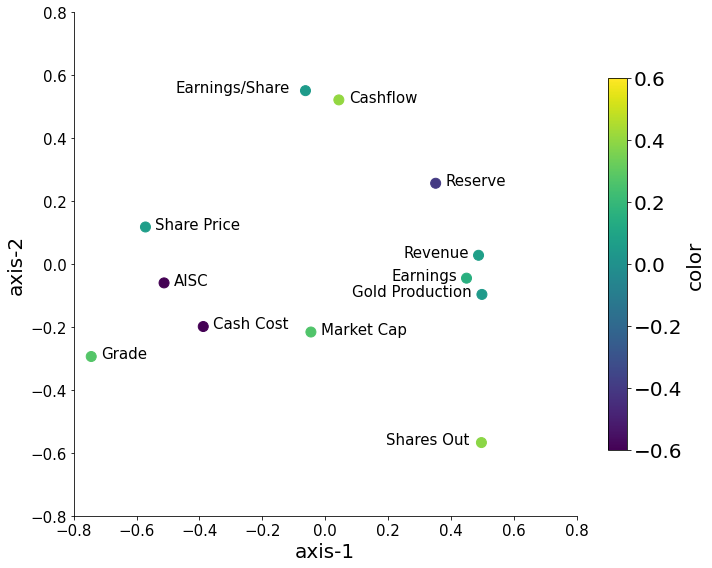

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_aspect('equal')
plot = ax.scatter(x, y, s=100, c=z, vmin=-0.6, vmax=0.6)

# Shifting conflicting labels.
for i, txt in enumerate(variables):
    if (txt == 'Revenue' or txt == 'Earnings'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-75, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    elif (txt == 'Shares Out'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-95, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    elif (txt == 'Gold Production' or txt == 'Earnings/Share'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-130, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    else:
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(10, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')

# Color bar
cbar = fig.colorbar(plot, pad=0.05, fraction=0.03)
cbar.solids.set_edgecolor("face")
cbar.set_label(label='color',size=20)
cbar.ax.tick_params(labelsize=20)

        
# Ticks and labels
ax.set_xlabel('axis-1', fontsize=20)
ax.set_ylabel('axis-2', fontsize=20)
ax.set_xlim((-0.8, 0.8))
ax.set_ylim((-0.8, 0.8))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

### 2. Euclidean Distance

In [31]:
euc_dist = pairwise_distances(df)

euc_model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
euc_trans = euc_model.fit_transform(euc_dist)

x = euc_trans[:,0]
y = euc_trans[:,1]
z = euc_trans[:,2]

(-4.0, 4.0)

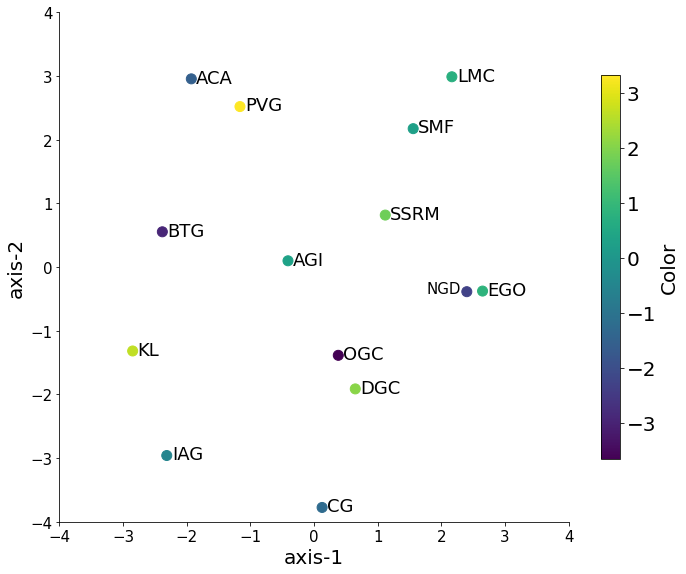

In [32]:
# Plot of MDS for companies 
fig, ax = plt.subplots(figsize=(10,8))
ax.set_aspect('equal')
plot = ax.scatter(x, y, s=100, c=z)

for i, txt in enumerate(companies):
    if (txt == 'NGD'):
        ax.annotate(txt, xy=(x[i], y[i]), xytext=(-40, 10),
                    fontsize=15, va='top',
                    xycoords='data', textcoords='offset points')
    else:
        ax.annotate(txt, (x[i], y[i]), xytext=(5, 10),
                    fontsize=18, va='top',
                    xycoords='data', textcoords='offset points') 
        
# Color bar        
cbar = fig.colorbar(plot, pad=0.05, fraction=0.03)
cbar.solids.set_edgecolor("face")
cbar.set_label(label='Color',size=20)
cbar.ax.tick_params(labelsize=20)

# Ticks  and labels
ax.set_xlabel('axis-1', fontsize=20)
ax.set_ylabel('axis-2', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.tight_layout()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))


<br/><br/>

<font size='4'><b> Final thoughts: </b> The above implemeted method is MDS-metric which is also known as Principal Coordinates Analysis (PCoA). MDS reduces dimensionality while trying to preserve  the distances  between the instances.</font>